General file where takes in some inputs (distance, resolution) at the start, and then outputs the EAGLE at some specified resolution and FOV.

Can use this template for telescopes other than Dragonfly or something (e.g. CASTOR).

In [1]:
import numpy as np
import eagle_constants_and_units as c
import cosmo_utils as csu
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mpl_toolkits.axes_grid1 as axgrid
from astropy import constants as const
from astropy import units as u

import os
import get_halpha_SB

%matplotlib inline

%run 'load_data.ipynb'
%run 'add_noise.ipynb'
%run 'extract_FOV.ipynb'
%run 'make_mockobs.ipynb'

In [4]:
machine='chinook'

distance = '980Mpc'; resolution = None; slicewidth = 20

data_tuple_20 = loaddata(machine=machine,resolution=resolution,distance=distance,slicewidth=slicewidth,DragonflyTelescope=False)


Resolution is None, finding minimum resolution of the similuation...
The resolution of the raw simulation at 980Mpc is 0.658865696816.
Loading data of slicewidth 20 (after rounding), number of slices is 4
./intermediatedata/data_980Mpc_1arcsec_20slwd.npz exists, loading now...
./intermediatedata/data_980Mpc_1arcsec_20slwd.npz was not saved as a tuple since too large, returning as tuple with 32000,1 appended.


In [5]:
data_tuple_20[0].shape

(32000, 32000)

In [12]:
resolution = 0.6 # arcsec
data_FOV, xystarts, size = extractFOV(data_tuple_20,resolution,distance,x_center=50.5,y_center=13.5,x_angFOV=3000.,y_angFOV=3000.)

The type of size is <type 'list'>


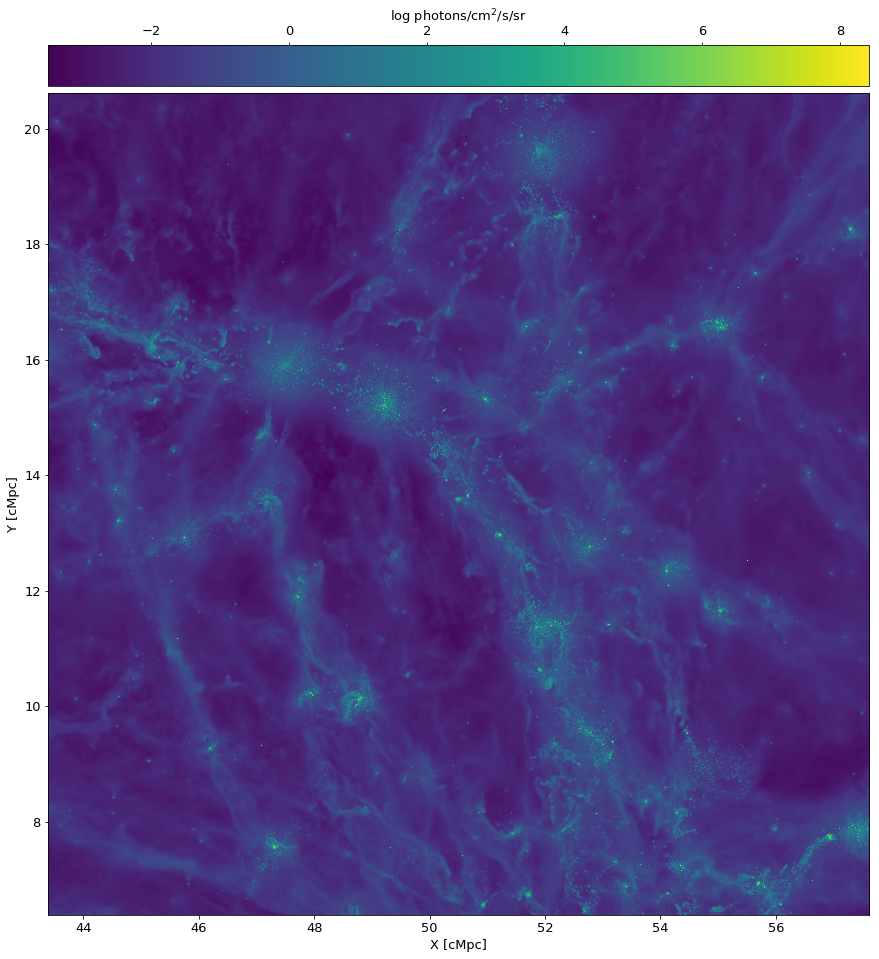

In [14]:
fig, (ax1) = plt.subplots(1, 1, figsize=(16, 16))
get_halpha_SB.makemap(data_FOV, size, ax1,xystarts = xystarts)


In [13]:
data_FOV.shape

(4554, 4554)